# ML4VA Music Recommendation System

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

songs = pd.read_csv("song.csv")

In [20]:
songs.head()

,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,1950,pop,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,...,0.380299,0.117175,0.357739,2.270595,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,1950,pop,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,...,0.001284,0.001284,0.331745,3.237700,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,1950,pop,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,...,0.002770,0.225422,0.456298,2.926442,0.840361,0.000000,0.351814,0.139112,music,1.0
3,1950,pop,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,...,0.225889,0.001548,0.686992,3.722021,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,1950,pop,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,...,0.068800,0.001350,0.291671,3.232444,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [26]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [27]:
songs.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


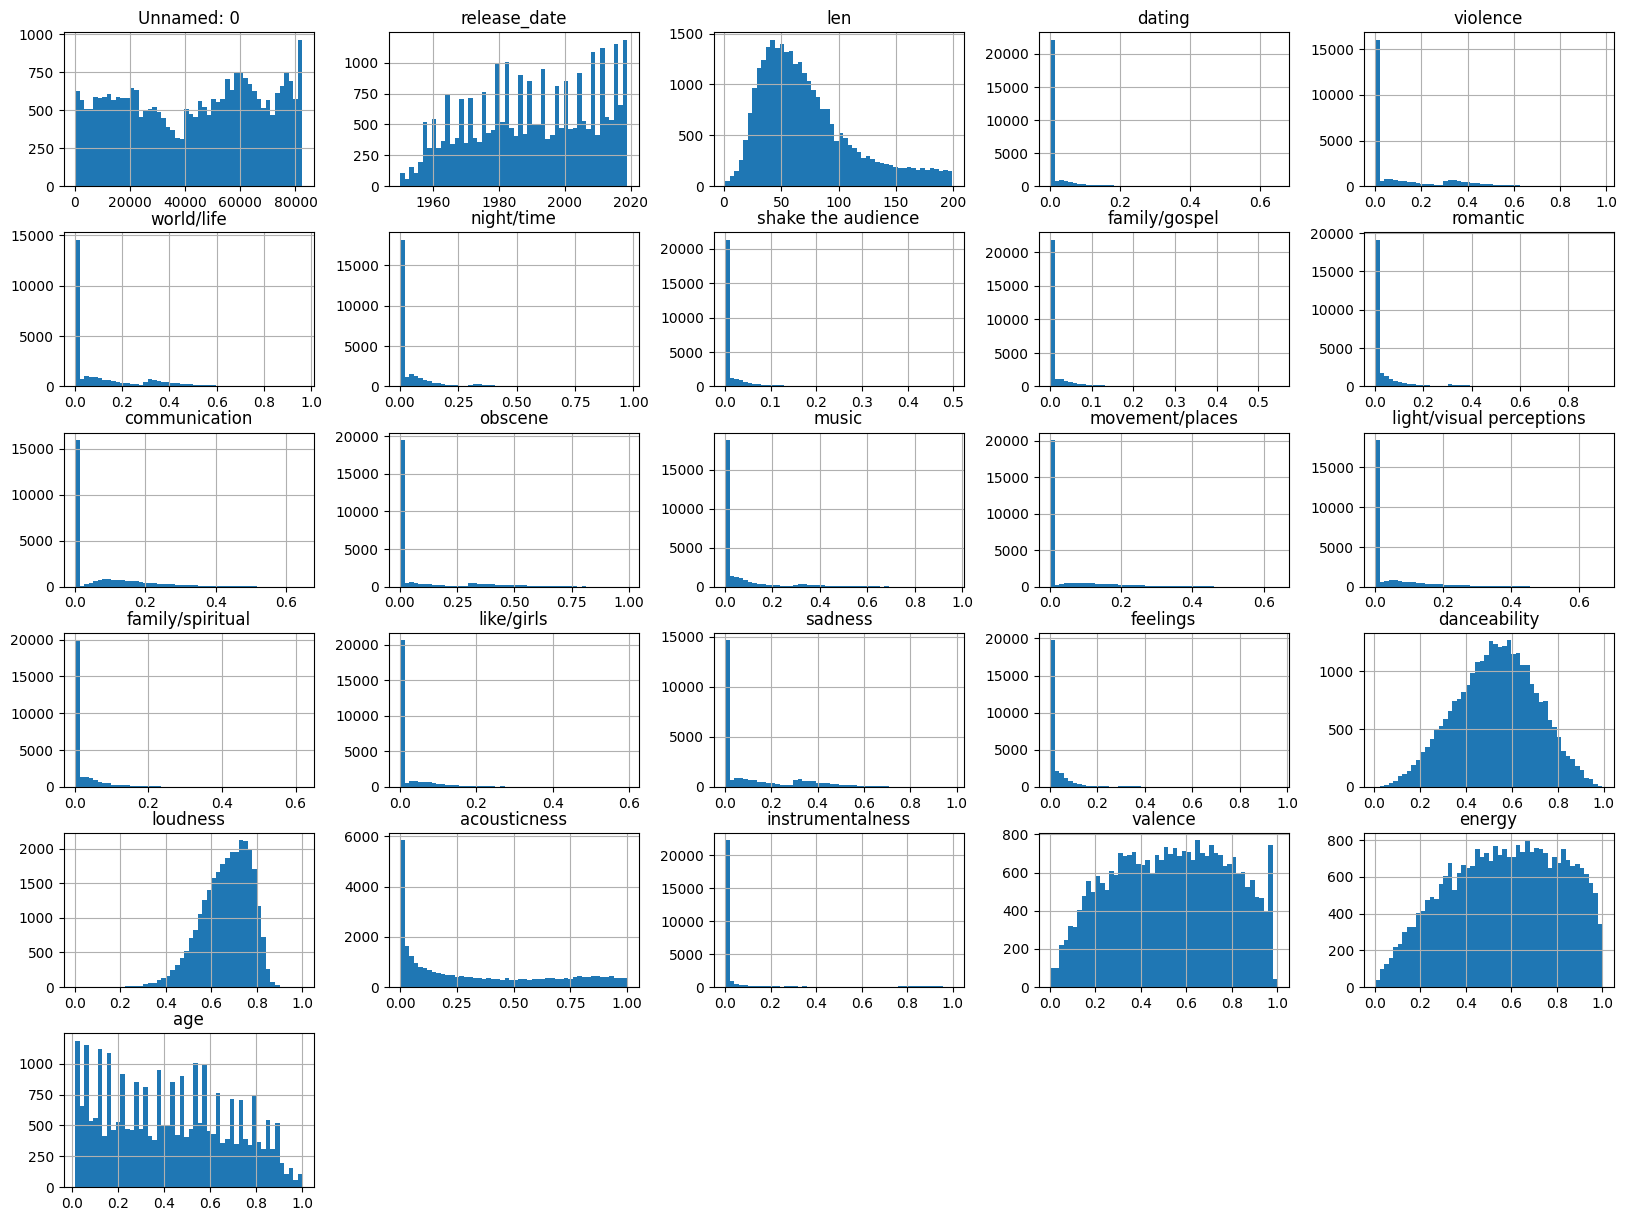

In [28]:
songs.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
songs.isnull().sum()

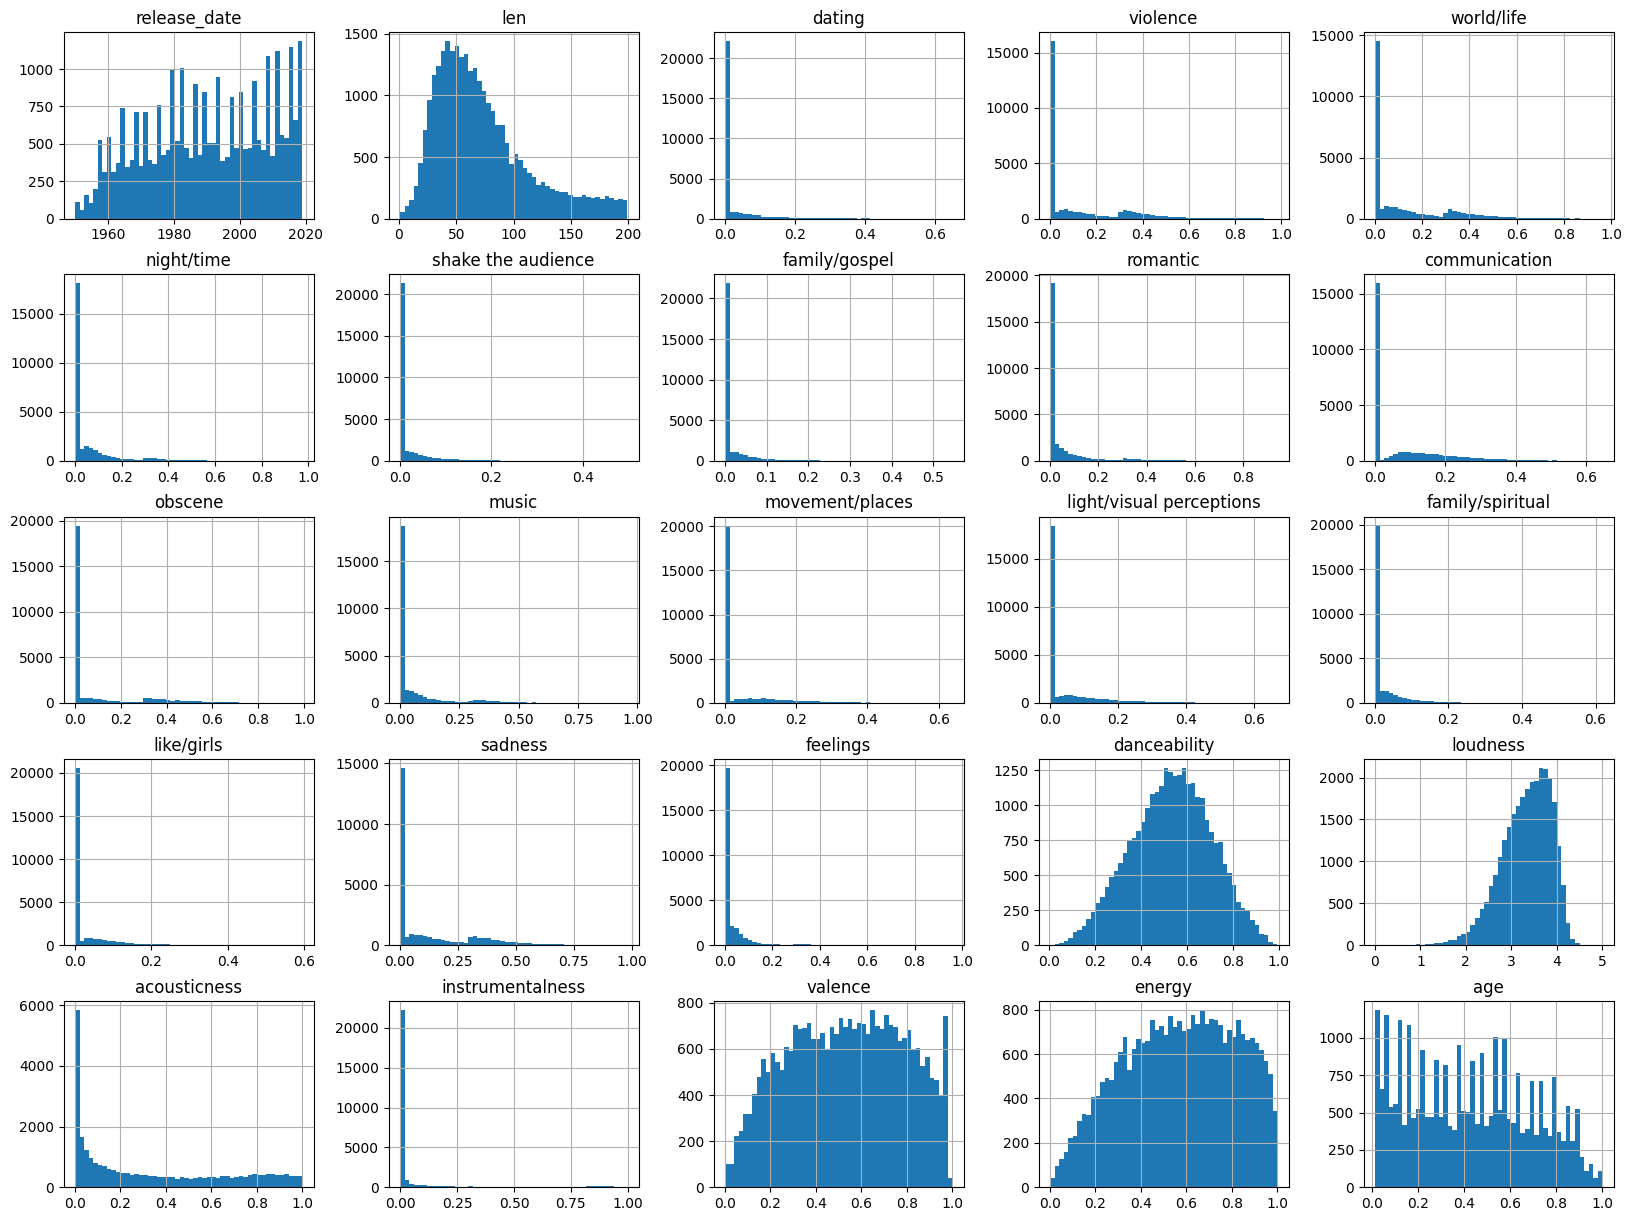

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              28372 non-null  int64  
 1   genre                     28372 non-null  object 
 2   len                       28372 non-null  int64  
 3   dating                    28372 non-null  float64
 4   violence                  28372 non-null  float64
 5   world/life                28372 non-null  float64
 6   night/time                28372 non-null  float64
 7   shake the audience        28372 non-null  float64
 8   family/gospel             28372 non-null  float64
 9   romantic                  28372 non-null  float64
 10  communication             28372 non-null  float64
 11  obscene                   28372 non-null  float64
 12  music                     28372 non-null  float64
 13  movement/places           28372 non-null  float64
 14  light/

In [29]:
#begin to clean data
#drop songs with null values
plt.show()
songs=songs.dropna()
# songs.info()

#scale
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
songsKeep = songs
songs.drop(columns=["Unnamed: 0"], inplace=True)
# songs['track_album_release_date'] = pd.to_datetime(songs['track_album_release_date'], errors='coerce')
songs['loudness'] = songs['loudness']*5
# songs.drop('track_album_release_date', axis=1, inplace=True)
columns_to_keep = ['genre', 'topic']
songs = songs.drop(columns=[col for col in songs.select_dtypes(include=['object']).columns if col not in columns_to_keep])
# songs = songs.drop(columns =["duration_ms"])
songs.hist(bins=50, figsize=(20,15))
plt.show()
songs.info()
num_columns = songs.select_dtypes(include=['float64', 'int64']).columns
cat_columns = songs.select_dtypes(include=['object']).columns
# categorical_weight = 100

# def weight_categorical_features(X):
#     return X * categorical_weight

# weight_transformer = FunctionTransformer(weight_categorical_features)


num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
    # ('weight', weight_transformer)
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', OneHotEncoder(), cat_columns)
])
songs_prepared = full_pipeline.fit_transform(songs)

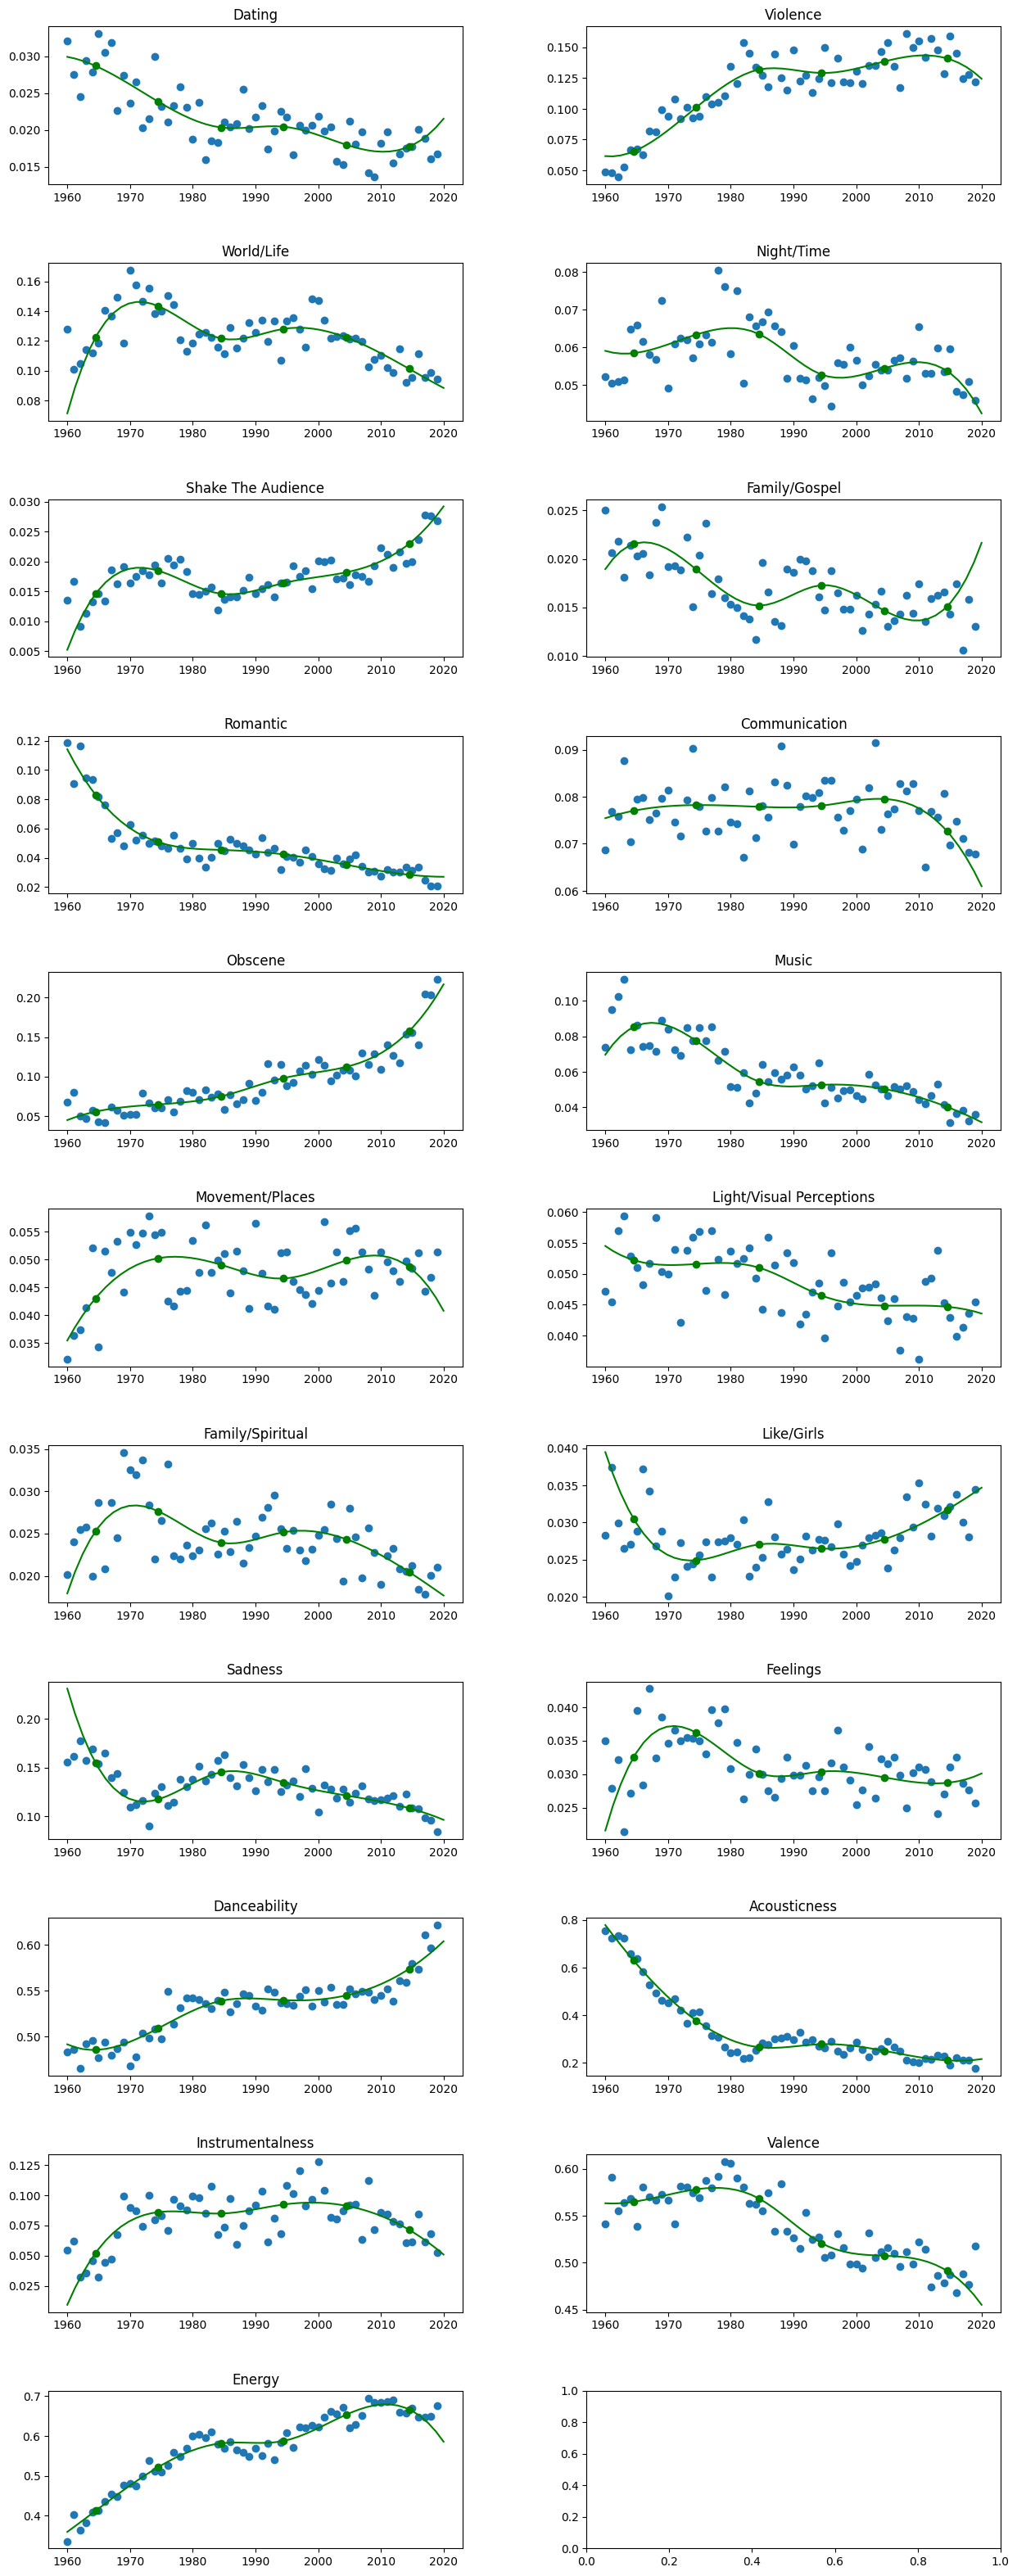

In [30]:
import numpy as np
from scipy.interpolate import CubicSpline

attributes = list(songs.columns[3:25])
skipped_atts = ['key','loudness','mode','liveness','speechiness']

songs_year = songs[songs['release_date'] >= 1960]
songs_year = songs_year[['release_date'] + attributes]
songs_year = songs_year.groupby('release_date').mean()
songs_year['release_date'] = songs_year.index

songs_year['decade'] = songs_year.index // 10 % 10 * 10
songs_year['decade'] = songs_year.decade.apply(lambda d: str(d).zfill(2))
songs_decade = songs_year.groupby('decade').mean()
songs_decade = songs_decade.sort_values(by='release_date')

year = list(songs_year.index)
decade = list(songs_decade.release_date)
# print(songs_decade)
# print(decade)


fig, ax = plt.subplots(11, 2, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

counter = 0

if 'mode' in skipped_atts:
    skipped_atts.remove('mode')

for att in attributes:
    if att in skipped_atts:
        continue
    row = counter // 2
    col = counter % 2
    counter += 1

    data = list(songs_year[att])
    decade_data = list(songs_decade[att])
    #tried polynomial fitting, but fit is not great
    #quad_fit = np.poly1d(np.polyfit(year, data, 5))
    lin = np.linspace(1960, 2020, 50)
    cs = CubicSpline(decade, songs_decade[att])

    ax[row,col].set_title(att.title())
    ax[row,col].scatter(year, data)
    ax[row,col].scatter(decade, decade_data, color='green')
    #plt.plot(quad_lin, quad_fit(quad_lin), color='green')
    ax[row,col].plot(lin, cs(lin), color='green')

plt.show();

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 100)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(songs_prepared)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#elbow point of 20
kmeans = KMeans(n_clusters=20, n_init='auto', random_state=1)
kmeans.fit(songs_prepared)
clusters = kmeans.predict(songs_prepared)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_prepared, clusters)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE()
songs_tsne = tsne.fit_transform(songs_prepared)

In [31]:
kmeans = KMeans(n_clusters=20, n_init='auto', random_state=1)
kmeans.fit(songs_prepared)
clusters = kmeans.predict(songs_prepared)

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(songs_tsne[:, 0], songs_tsne[:, 1], alpha=0.5, s=10, c = clusters, cmap="tab10")
plt.title('t-SNE Visualization of Songs Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [38]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import cosine_distances
# def find_closest_song(song_name, songs, songs_prepared, kmeans):
#     song_index = songs[songs['track_name'] == song_name].index[0]
#     print(songs.iloc[song_index])
#     song_cluster = kmeans.predict(songs_prepared[song_index].reshape(1, -1))[0]
#     cluster_indices = np.where(kmeans.labels_ == song_cluster)[0]
#     cluster_indices = cluster_indices[cluster_indices != song_index]
#     distances = pairwise_distances_argmin_min(songs_prepared[song_index].reshape(1, -1), songs_prepared[cluster_indices])[1]
#     closest_song_index = cluster_indices[distances.argmin()]
#     return songs.iloc[closest_song_index]

def find_top_5_songs(song_name, songs, songs_prepared, kmeans):
    import numpy as np
    from sklearn.metrics.pairwise import cosine_distances
    song_index = songs[songs['track_name'] == song_name].index[0]
    print(songs.iloc[song_index])
    song_cluster = kmeans.predict(songs_prepared[song_index].reshape(1, -1))[0]
    cluster_indices = np.where(kmeans.labels_ == song_cluster)[0]
    cluster_indices = cluster_indices[cluster_indices != song_index]
    distances = cosine_distances(
        songs_prepared[song_index].reshape(1, -1),
        songs_prepared[cluster_indices]
    )[0]
    top_5_indices = cluster_indices[np.argsort(distances)[:5]]
    top_5_songs = songs.iloc[top_5_indices][['track_name', 'artist_name']]
    return top_5_songs

top_5_songs = find_top_5_songs("the one that got away", songsKeep, songs_prepared, kmeans)
print(top_5_songs)

# def find_closest_song(song_name, songs, songs_prepared, kmeans):
#   if songs[songs['track_name'] == song_name].empty:
#     raise ValueError(f"Song '{song_name}' not found in the dataset.")
#   song_index = songs[songs['track_name'] == song_name].index[0]
#   print(songs.iloc[song_index])
#   song_cluster = kmeans.predict(songs_prepared[song_index].reshape(1, -1))[0]
#   cluster_indices = np.where(kmeans.labels_ == song_cluster)[0]
#   cluster_indices = cluster_indices[cluster_indices != song_index]
#   distances = cosine_distances(
#     songs_prepared[song_index].reshape(1, -1),
#     songs_prepared[cluster_indices]
#     )[0]
#   closest_song_index = cluster_indices[distances.argmin()]
#   return songs.iloc[closest_song_index]
# # print(songs.columns)
# print(find_closest_song("la de la mala suerte", songsKeep, songs_prepared, kmeans))

artist_name                                                        katy perry
track_name                                              the one that got away
release_date                                                             2010
genre                                                                     pop
lyrics                      summer high school mustang radiohead birthday ...
len                                                                        74
dating                                                               0.000892
violence                                                             0.000892
world/life                                                           0.375478
night/time                                                           0.000892
shake the audience                                                   0.036904
family/gospel                                                        0.000892
romantic                                                        

<ipython-input-15-9ab3db34a073>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=label_name, alpha=0.6, s=10)


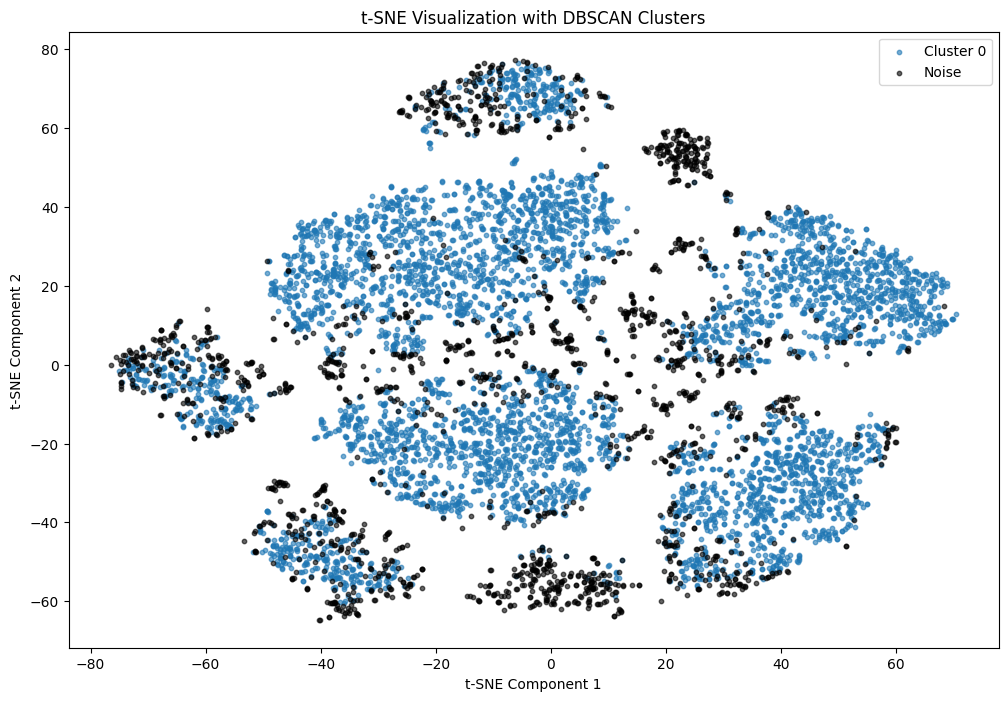

In [15]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=50)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(songs_prepared)

# Count unique clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Apply t-SNE for visualization
tsne = TSNE()
songs_tsne = tsne.fit_transform(songs_prepared)

# Visualize DBSCAN results
plt.figure(figsize=(12, 8))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    # Plot noise as black points
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label / n_clusters)  # Assign unique color
        label_name = f'Cluster {label}'

    cluster_points = songs_tsne[dbscan_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=label_name, alpha=0.6, s=10)

plt.title('t-SNE Visualization with DBSCAN Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
